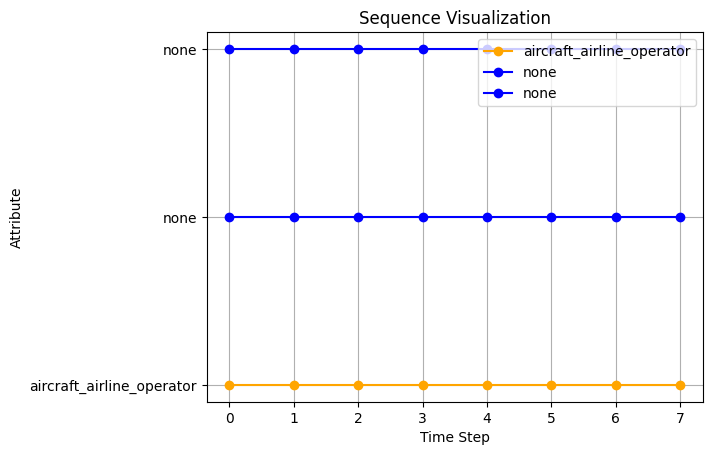

In [3]:
import matplotlib.pyplot as plt

# Sample sequence
sequence = [['aircraft_airline_operator', 'none', 'none'],
            ['aircraft_airline_operator', 'none', 'none'],
            ['aircraft_airline_operator', 'none', 'speed_ias_in_knots'],
            ['none', 'none', 'wildlife_size'],
            ['aircraft_airline_operator', 'none', 'speed_ias_in_knots'],
            ['aircraft_airline_operator', 'none', 'speed_ias_in_knots'],
            ['aircraft_airline_operator', 'none', 'speed_ias_in_knots'],
            ['aircraft_airline_operator', 'none', 'none']]

# Colors for different attributes
colors = {'none': 'blue', 'speed_ias_in_knots': 'red', 'wildlife_size': 'green', 'aircraft_airline_operator': 'orange'}

# Plot each attribute as a line
for i, attr in enumerate(zip(*sequence)):
    plt.plot(range(len(sequence)), [i] * len(sequence), color=colors[attr[0]], marker='o', label=attr[0])

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Time Step')
plt.ylabel('Attribute')
plt.title('Sequence Visualization')

# Show plot
plt.yticks(range(len(sequence[0])), sequence[0])  # Set y-axis labels to attribute names
plt.grid(True)
plt.show()

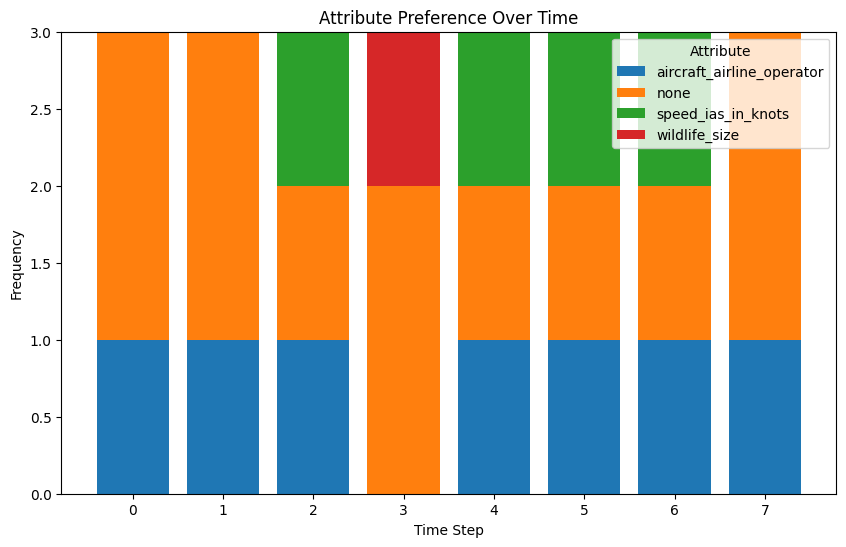

In [4]:
import matplotlib.pyplot as plt

# Sample sequence
sequence = [['aircraft_airline_operator', 'none', 'none'],
            ['aircraft_airline_operator', 'none', 'none'],
            ['aircraft_airline_operator', 'none', 'speed_ias_in_knots'],
            ['none', 'none', 'wildlife_size'],
            ['aircraft_airline_operator', 'none', 'speed_ias_in_knots'],
            ['aircraft_airline_operator', 'none', 'speed_ias_in_knots'],
            ['aircraft_airline_operator', 'none', 'speed_ias_in_knots'],
            ['aircraft_airline_operator', 'none', 'none']]

# Get unique attributes
unique_attributes = sorted(set(sum(sequence, [])))

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
bottom = None
for attr in unique_attributes:
    heights = [seq.count(attr) for seq in sequence]
    plt.bar(range(len(sequence)), heights, bottom=bottom, label=attr)
    if bottom is None:
        bottom = heights
    else:
        bottom = [sum(pair) for pair in zip(bottom, heights)]
plt.xlabel('Time Step')
plt.ylabel('Frequency')
plt.title('Attribute Preference Over Time')
plt.legend(title='Attribute')
plt.show()


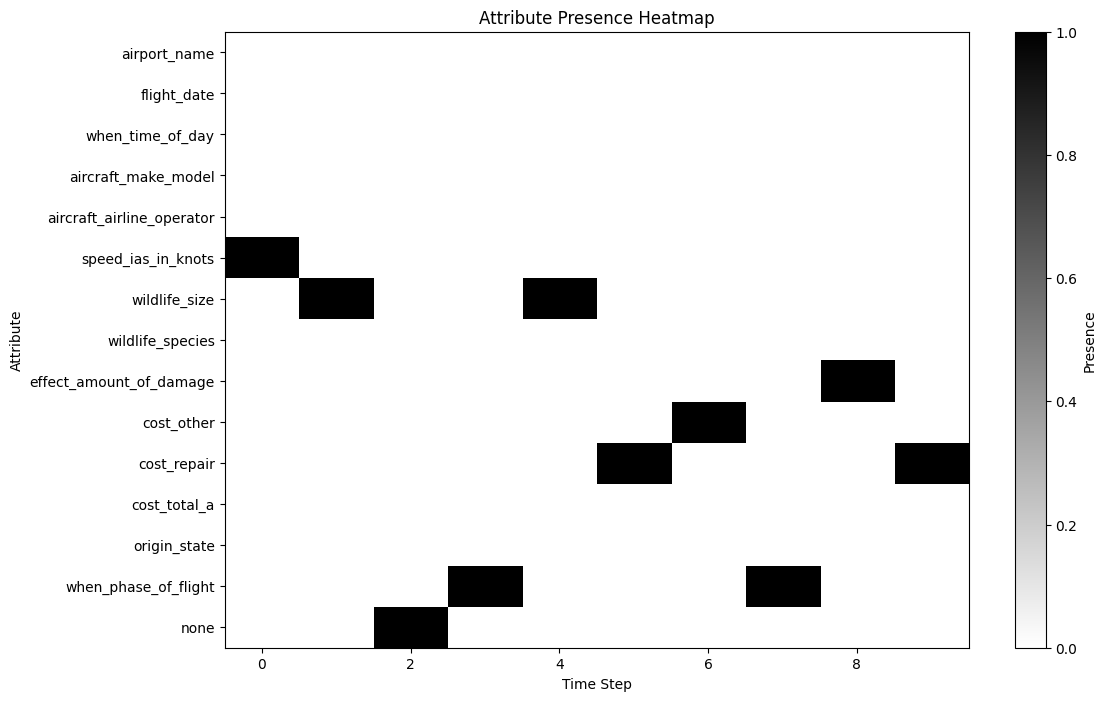

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Sample sequence
sequence = [['airport_name', 'none', 'none'],
            ['airport_name', 'none', 'none'],
            ['airport_name', 'none', 'speed_ias_in_knots'],
            ['none', 'none', 'wildlife_size'],
            ['airport_name', 'none', 'speed_ias_in_knots'],
            ['airport_name', 'none', 'speed_ias_in_knots'],
            ['airport_name', 'none', 'speed_ias_in_knots'],
            ['airport_name', 'none', 'none']]

# Field names
fieldnames = ['airport_name', 'flight_date', 'when_time_of_day',
              'aircraft_make_model', 'aircraft_airline_operator', 'speed_ias_in_knots',
              'wildlife_size', 'wildlife_species',
              'effect_amount_of_damage', 'cost_other', 'cost_repair', 'cost_total_a',
              'origin_state',
              'when_phase_of_flight',
              'none']


num_sequences = 1
sequence_length = 10

# Generate random sequences based on the field names
sequences = [np.random.choice(fieldnames, size=(sequence_length,), replace=True) for _ in range(num_sequences)]
sequence = sequences[0]

# Create a heatmap
plt.figure(figsize=(12, 8))

# Create an empty heatmap grid
heatmap = np.zeros((len(fieldnames), len(sequence)))

# Fill in the heatmap grid
for i, attr in enumerate(fieldnames):
    for j, step in enumerate(sequence):
        if attr in step:
            heatmap[i, j] = 1  # Attribute is present

plt.imshow(heatmap, cmap='binary', aspect='auto')
plt.yticks(range(len(fieldnames)), fieldnames)
plt.xlabel('Time Step')
plt.ylabel('Attribute')
plt.title('Attribute Presence Heatmap')
plt.colorbar(label='Presence')
plt.show()


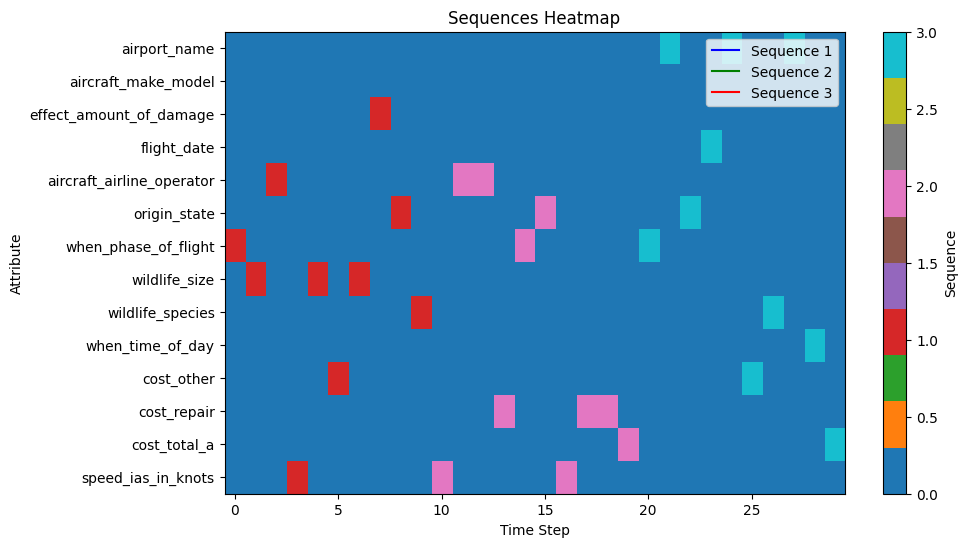

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample field names
fieldnames = ['airport_name', 'aircraft_make_model', 'effect_amount_of_damage', 'flight_date',
              'aircraft_airline_operator', 'origin_state', 'when_phase_of_flight', 'wildlife_size',
              'wildlife_species', 'when_time_of_day', 'cost_other', 'cost_repair', 'cost_total_a',
              'speed_ias_in_knots']

# Create sequences
num_sequences = 3
sequence_length = 10

# Generate random sequences based on the field names
sequences = [np.random.choice(fieldnames, size=(sequence_length,), replace=True) for _ in range(num_sequences)]

# Create colors for each sequence
sequence_colors = ['blue', 'green', 'red']

# Create a heatmap grid
heatmap_grid = np.zeros((len(fieldnames), sequence_length * num_sequences))

# Fill the heatmap grid with values indicating presence of attributes
for i, (sequence, color) in enumerate(zip(sequences, sequence_colors)):
    for j, attr in enumerate(sequence):
        heatmap_grid[fieldnames.index(attr), i * sequence_length + j] = i + 1  # Assign a different value for each sequence

# Plot the heatmaps
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(heatmap_grid, cmap='tab10', aspect='auto', interpolation='nearest')
plt.title('Sequences Heatmap')
plt.xlabel('Time Step')
plt.ylabel('Attribute')
plt.yticks(np.arange(len(fieldnames)), fieldnames)

# Add a legend to indicate the sequences
for i, color in enumerate(sequence_colors):
    plt.plot([], [], color=color, label=f'Sequence {i+1}')

plt.legend()
plt.colorbar(heatmap, label='Sequence')
plt.show()


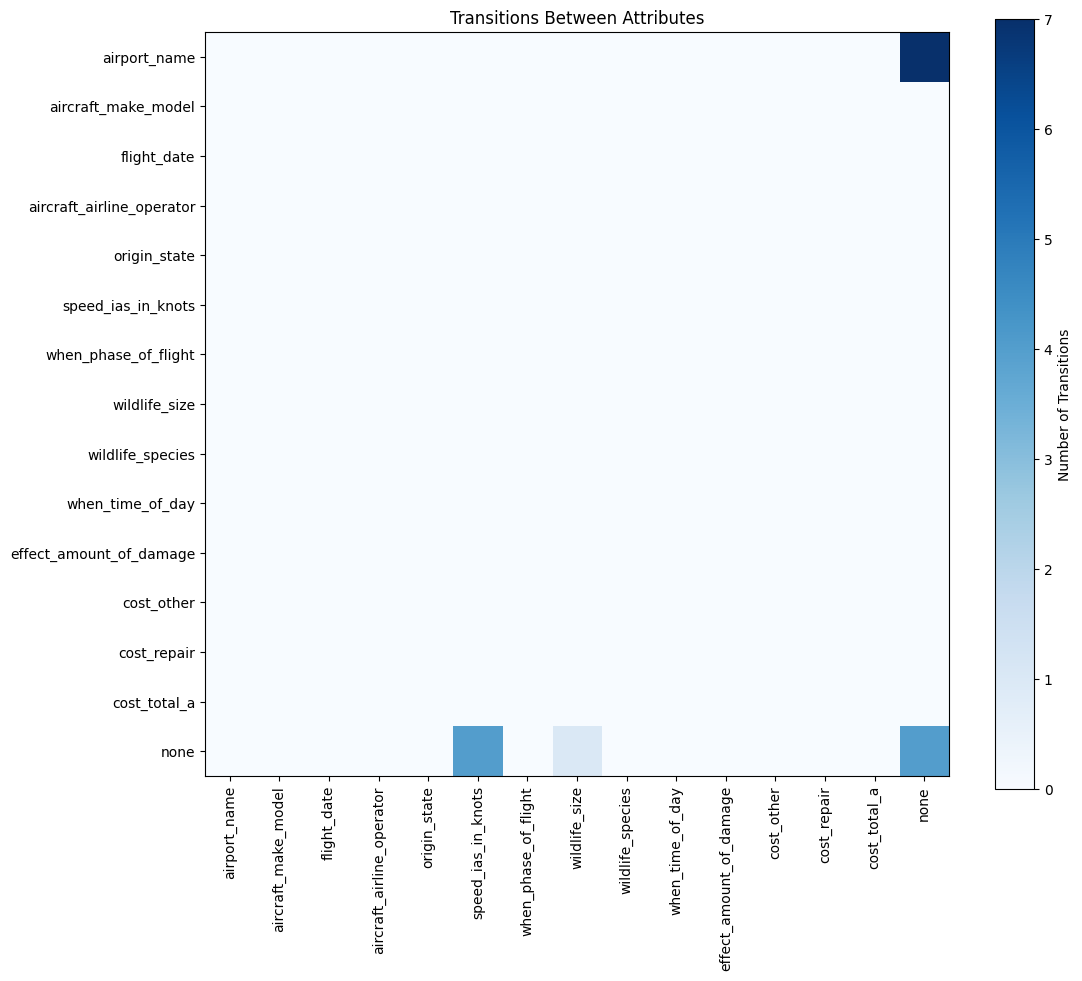

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def generate_transition_matrix(sequence, labels):
    num_attributes = len(labels)
    transition_matrix = np.zeros((num_attributes, num_attributes), dtype=int)

    for seq in sequence:
        for i in range(len(seq) - 1):
            source_index = labels.index(seq[i])
            target_index = labels.index(seq[i + 1])
            transition_matrix[source_index][target_index] += 1

    return transition_matrix

def plot_transition_heatmap(transition_matrix, labels):
    plt.figure(figsize=(12, 10))
    plt.imshow(transition_matrix, cmap='Blues')

    # Add labels
    plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=90)
    plt.yticks(ticks=np.arange(len(labels)), labels=labels)

    # Add colorbar
    plt.colorbar(label='Number of Transitions')

    # Add title and show plot
    plt.title('Transitions Between Attributes')
    plt.show()

def get_all_possible_transitions(labels):
    num_attributes = len(labels)
    all_possible_transitions = []

    for i in range(num_attributes):
        for j in range(num_attributes):
            all_possible_transitions.append((labels[i], labels[j]))

    return all_possible_transitions

def main():
    # Fieldnames
    fieldnames = ['airport_name', 'aircraft_make_model', 'flight_date',
                  'aircraft_airline_operator', 'origin_state', 'speed_ias_in_knots','when_phase_of_flight', 'wildlife_size',
                  'wildlife_species', 'when_time_of_day','effect_amount_of_damage', 'cost_other', 'cost_repair', 'cost_total_a',
                  'none']

    # Create sequence (example)
    sequence = [['airport_name', 'none', 'none'],
                ['airport_name', 'none', 'none'],
                ['airport_name', 'none', 'speed_ias_in_knots'],
                ['none', 'none', 'wildlife_size'],
                ['airport_name', 'none', 'speed_ias_in_knots'],
                ['airport_name', 'none', 'speed_ias_in_knots'],
                ['airport_name', 'none', 'speed_ias_in_knots'],
                ['airport_name', 'none', 'none']]

    labels = fieldnames

    # Create an empty transition matrix
    transition_matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # Fill the transition matrix
    for seq in sequence:
        for i in range(len(seq) - 1):
            source_index = labels.index(seq[i])
            target_index = labels.index(seq[i + 1])
            transition_matrix[source_index][target_index] += 1

    # Plot the heatmap
    plot_transition_heatmap(transition_matrix, labels)

if __name__ == "__main__":
    main()
